In [1]:
from gspan_mining.config import parser
from gspan_mining.main import main
import numpy as np
import sys
egg_path='/gspan_mining.egg'

sys.path.append(egg_path)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def is_clique(g):
    vertices = g.vertices
    deg_list = [len(vertices[v].edges) for v in vertices]
    edge_count = int(np.sum(deg_list)//2)
    v_count = len(vertices)
    if edge_count == v_count*(v_count-1)/2:
        return True
    return False

In [4]:
def prob_format(g):
    vertices = g.vertices
    vertex_map = dict([(vertices[v].vid, vertices[v].vlb) for v in vertices])
    # print(vertex_map)
    edge_dict_lists = [vertices[v].edges for v in vertices]
    all_edge_list = []
    for edge_dict in edge_dict_lists:
        for key in list(edge_dict.keys()):
            new_edge = (edge_dict[key].frm, edge_dict[key].to)
            all_edge_list.append(new_edge)
            
    G = nx.from_edgelist(all_edge_list)
    adj_mat = nx.to_numpy_matrix(G)
    np.fill_diagonal(adj_mat, 0)
    return vertex_map, adj_mat 

In [5]:
def edge_count(g):
    vertices = g.vertices
    deg_list = [len(vertices[v].edges) for v in vertices]
    edge_count = int(np.sum(deg_list)//2)
    return edge_count

In [6]:
def node_count(g):
    vertices = g.vertices
    return len(vertices)

In [9]:
args_str = '-s 700 -d False -l 4 -e 5 -p False -w False -t False freq_subgraph_u2os/graph0.005.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

In [10]:
gs = main(FLAGS)

KeyboardInterrupt: 

In [ ]:
filtered_subgraphs = gs.filtered_subgraphs

In [ ]:
cliques = []
for g, support in filtered_subgraphs:
    if is_clique(g):
        cliques.append((g, support))  
        vertex_map, adj_mat  = prob_format(g)
        print(adj_mat)
        print(vertex_map)

In [ ]:
for g, support in cliques:
    g.plot()
    print('Support: ', support)

In [ ]:
support_list = []
for g, support in filtered_subgraphs:
    v_count = node_count(g)
    if v_count > 4 and edge_count(g) > v_count*(v_count-1)//3:
        g.plot()
        support_list.append(support)
        print(support)

In [ ]:
plt.hist(support_list, bins=15)

# Random graph:

In [79]:
args_str = '-s 2 -d False -l 3 -e 2 -p False -w False -t False freq_subgraph_rand_u2os/graph0.05.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

In [80]:
gs_rand = main(FLAGS)

Read:	20.71 s
Mine:	1.4499999999999993 s
Total:	22.16 s


In [81]:
filtered_subgraphs_rand = gs_rand.filtered_subgraphs

In [82]:
cliques = []
for g, support in filtered_subgraphs_rand:
    if is_clique(g):
        cliques.append((g, support)) 

In [83]:
for g, support in cliques:
    g.plot()
    print('Support: ', support)

In [84]:
support_list = []
for g, support in filtered_subgraphs_rand:
    v_count = node_count(g)
    if v_count > 3 and edge_count(g) > v_count*(v_count-1)//3:
        g.plot()
        support_list.append(support)
        print(support)

Support:  2


<Figure size 216x216 with 0 Axes>

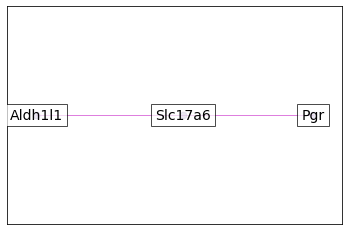

Support:  2


<Figure size 216x216 with 0 Axes>

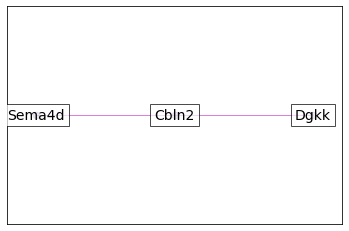

Support:  2


<Figure size 216x216 with 0 Axes>

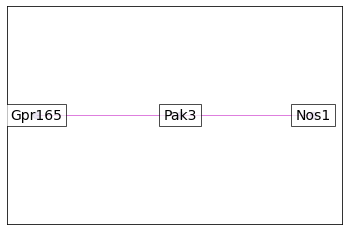

Support:  2


<Figure size 216x216 with 0 Axes>

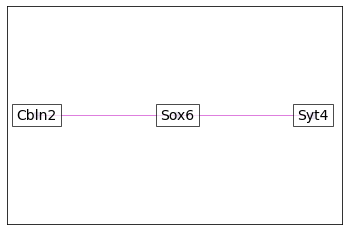

Support:  2


<Figure size 216x216 with 0 Axes>

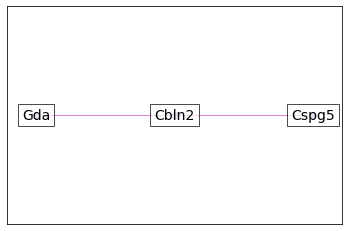

Support:  2


<Figure size 216x216 with 0 Axes>

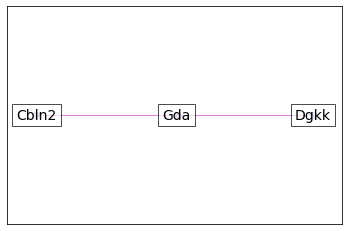

Support:  2


<Figure size 216x216 with 0 Axes>

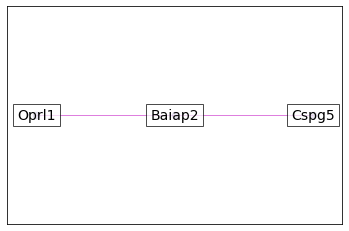

Support:  2


<Figure size 216x216 with 0 Axes>

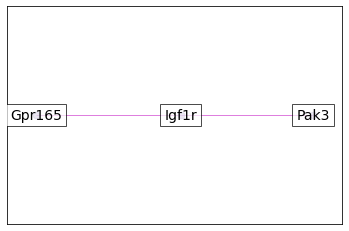

Support:  2


<Figure size 216x216 with 0 Axes>

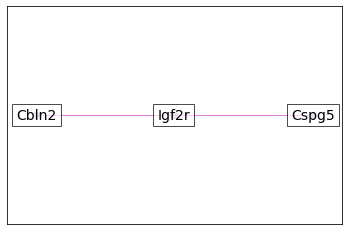

Support:  3


<Figure size 216x216 with 0 Axes>

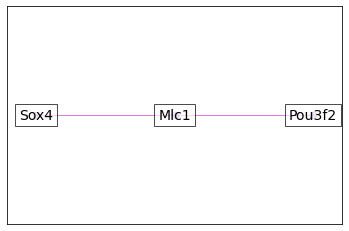

Support:  2


<Figure size 216x216 with 0 Axes>

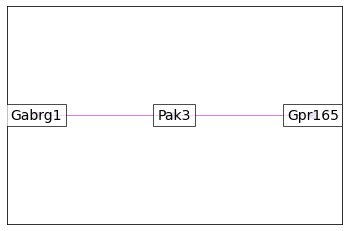

Support:  2


<Figure size 216x216 with 0 Axes>

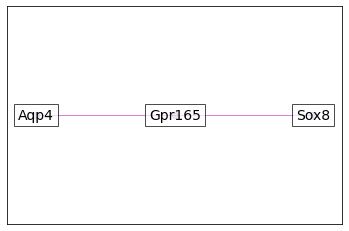

Support:  2


<Figure size 216x216 with 0 Axes>

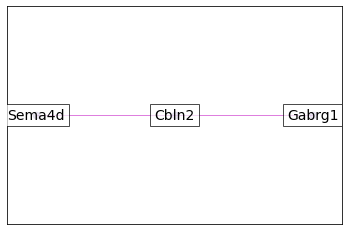

Support:  2


<Figure size 216x216 with 0 Axes>

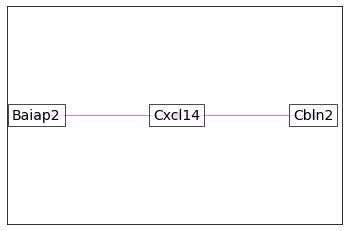

Support:  2


<Figure size 216x216 with 0 Axes>

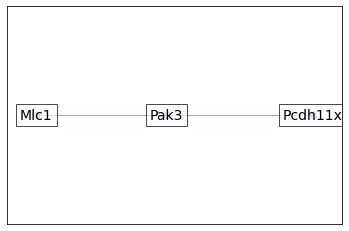

Support:  2


<Figure size 216x216 with 0 Axes>

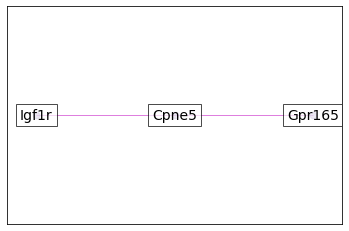

Support:  2


<Figure size 216x216 with 0 Axes>

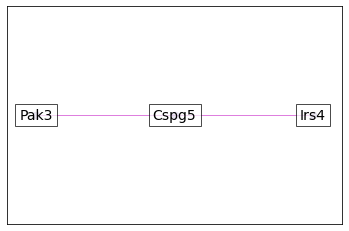

Support:  2


<Figure size 216x216 with 0 Axes>

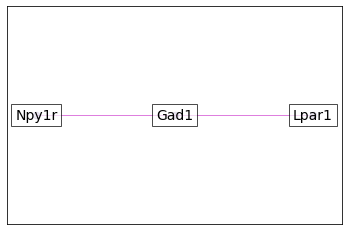

Support:  2


<Figure size 216x216 with 0 Axes>

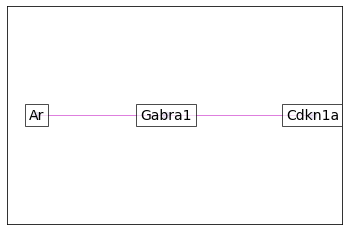

Support:  2


<Figure size 216x216 with 0 Axes>

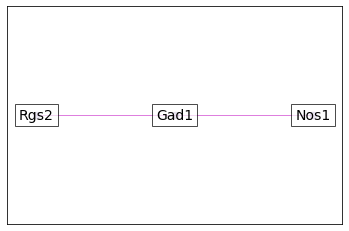

Support:  2


<Figure size 216x216 with 0 Axes>

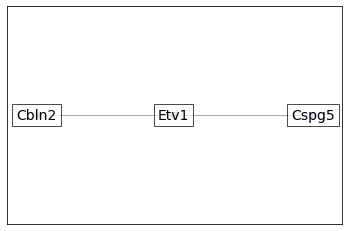

Support:  2


<Figure size 216x216 with 0 Axes>

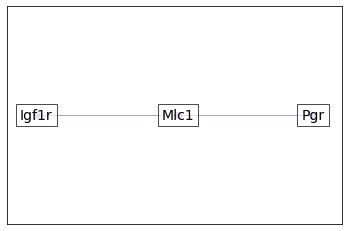

Support:  2


<Figure size 216x216 with 0 Axes>

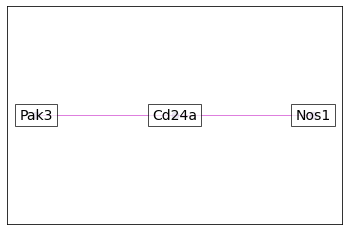

In [85]:
for g, s in filtered_subgraphs_rand:
    if s > 1:
        print('Support: ', s)
        g.plot()